# Functional API 
Implementing the functional API for the previously used lenet model\\
```
model= tf.keras.Sequential([
    InputLayer (input_shape= (IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters = 6, kernel_size = 5, strides=1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides= 2),
    Conv2D(filters = 16, kernel_size = 5, strides=1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides= 2),
    Flatten (),

    Dense (100, activation = "relu"),
    BatchNormalization(),
    Dense (10, activation = "relu"),
    BatchNormalization(),
    Dense (1, activation = "sigmoid"),
])
```

In [2]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy, BinaryAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer, RandomRotation, RandomFlip,Resizing, Rescaling
import tensorflow_probability as tfp
import cv2 as cv2

In [137]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised=True, shuffle_files = True, split = ['train'])

def splits(dataset, TRAIN_RATIO , VAL_RATIO , TEST_RATIO, print_results = False):    
    
    DATASET_SIZE = len(dataset)
    train_dataset = dataset.take(int( TRAIN_RATIO * DATASET_SIZE))
    
    
    val_test_dataset = dataset.skip(int( TRAIN_RATIO * DATASET_SIZE))
    val_dataset = val_test_dataset.take(int( VAL_RATIO * DATASET_SIZE))
    
    
    test_dataset = val_test_dataset.skip(int( VAL_RATIO * DATASET_SIZE))
    

    if print_results == True:
        print(list(dataset.as_numpy_iterator()))
        print(list(train_dataset.as_numpy_iterator()))
        print(list(val_dataset.as_numpy_iterator()))
        print(list(test_dataset.as_numpy_iterator()))
    return train_dataset, val_dataset, test_dataset

TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# dataset = tf.data.Dataset.range(10)

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO , VAL_RATIO , TEST_RATIO) #here
print(list(train_dataset.take(1).as_numpy_iterator()), 
      list(val_dataset.take(1).as_numpy_iterator()), 
      list(test_dataset.take(1).as_numpy_iterator()))

IM_SIZE = 224
def resize_rescale(image, label):
    return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1)

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [114]:
image = train_dataset.take(1).element_spec[0]
label = train_dataset.take(1).element_spec[-1]
# plt.imshow(image)
# plt.title(dataset_info.features['label'].int2str(label))
# plt.axis('off')

In [129]:
for i,(image, label) in enumerate(train_dataset.take(1)):
    print(tf.shape(image))
    print(label)

tf.Tensor([ 32 224 224   3], shape=(4,), dtype=int32)
tf.Tensor([1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1], shape=(32,), dtype=int64)


In [45]:
IM_SIZE = 224
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input Image")

x =  Conv2D(filters = 6, kernel_size = 5, strides=1, padding='valid', activation = 'relu')(func_input)
x =  BatchNormalization()(x)
x =  MaxPool2D (pool_size = 2, strides= 2)(x)
x =  Conv2D(filters = 16, kernel_size = 5, strides=1, padding='valid', activation = 'relu')(x)
x =  BatchNormalization()(x)
x =  MaxPool2D (pool_size = 2, strides= 2)(x)
x =  Flatten ()(x)

x =  Dense (100, activation = "relu")(x)
x =  BatchNormalization()(x)
x =  Dense (10, activation = "relu")(x)
x =  BatchNormalization()(x)
func_output =  Dense (1, activation = "sigmoid")(x)

lenet_model = Model(func_input, func_output, name = "Lenet_Model")
lenet_model.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_30 (Ba  (None, 220, 220, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 110, 110, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_31 (Ba  (None, 106, 106, 16)      

# Functional API with mixing ways of creating functions, here combo is with sequential model

In [46]:
feature_extractor= tf.keras.Sequential([
    InputLayer (input_shape= (IM_SIZE, IM_SIZE, 3)),
    
    Conv2D(filters = 6, kernel_size = 5, strides=1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides= 2),
    
    Conv2D(filters = 16, kernel_size = 5, strides=1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides= 2),
])

In [47]:
IM_SIZE = 224
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input Image")

x =  feature_extractor(func_input)
x =  Flatten ()(x)

x =  Dense (100, activation = "relu")(x)
x =  BatchNormalization()(x)
x =  Dense (10, activation = "relu")(x)
x =  BatchNormalization()(x)
func_output =  Dense (1, activation = "sigmoid")(x)

lenet_model = Model(func_input, func_output, name = "Lenet_Model")
lenet_model.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 53, 53, 16)        2960      
                                                                 
 flatten_5 (Flatten)         (None, 44944)             0         
                                                                 
 dense_24 (Dense)            (None, 100)               4494500   
                                                                 
 batch_normalization_36 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                       

# Model Subclassing

In [48]:
class Feature_Extractor(Layer):
    def __init__(self, filters, kernel_size, strides, padding, activation, pool_size,):
        super(Feature_Extractor, self).__init__()
        
        self.conv_1 = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding=padding, activation = activation)
        self.batch_1 = BatchNormalization ()
        self.pool_1 = MaxPool2D (pool_size = pool_size, strides= 2*strides)
        
        self.conv_2 = Conv2D(filters = filters*2, kernel_size = kernel_size, strides = strides, padding=padding, activation = activation)
        self.batch_2 = BatchNormalization ()
        self.pool_2 = MaxPool2D (pool_size = pool_size , strides= 2*strides)
        
    def call(self, x, training):
        x = self.conv_1(x)
        x = self.batch_1(x)
        x = self.pool_1(x)
    
        x = self.conv_2(x)
        x = self.batch_2(x)
        x = self.pool_2(x)
        return x

In [49]:
feature_sub_classed = Feature_Extractor(8,3,1,"valid", "relu", 2)

In [50]:
IM_SIZE = 224
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input Image")

x =  feature_sub_classed(func_input)
x =  Flatten ()(x)

x =  Dense (100, activation = "relu")(x)
x =  BatchNormalization()(x)
x =  Dense (10, activation = "relu")(x)
x =  BatchNormalization()(x)
func_output =  Dense (1, activation = "sigmoid")(x)

lenet_model = Model(func_input, func_output, name = "Lenet_Model")
lenet_model.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature__extractor_4 (Feat  (None, 54, 54, 16)        1488      
 ure_Extractor)                                                  
                                                                 
 flatten_6 (Flatten)         (None, 46656)             0         
                                                                 
 dense_27 (Dense)            (None, 100)               4665700   
                                                                 
 batch_normalization_40 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_28 (Dense)            (None, 10)                

In [63]:
class LenetModel(Model):
    def __init__(self):
        super(LenetModel, self).__init__()
        
        self.feature_extractor = Feature_Extractor(8,3,1,"valid", "relu", 2)
        self.flatten = Flatten()
        self.dense_1 = Dense (100, activation = "relu")
        self.batch_norm_1 = BatchNormalization()
        
        self.dense_2 = Dense (10, activation = "relu")
        self.batch_norm_2 = BatchNormalization()

        self.dense_3 = Dense (1, activation = "sigmoid")
        
    def call(self, x, training):
        x = self.feature_extractor(x)
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.batch_norm_1(x)
    
        x = self.dense_2(x)
        x = self.batch_norm_2(x)
        x = self.dense_3(x)
        return x

In [64]:
lenet_model = LenetModel()
lenet_model(tf.zeros([1,224,224,3]))
lenet_model.summary()

Model: "lenet_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature__extractor_7 (Feat  multiple                  1488      
 ure_Extractor)                                                  
                                                                 
 flatten_7 (Flatten)         multiple                  0         
                                                                 
 dense_36 (Dense)            multiple                  4665700   
                                                                 
 batch_normalization_52 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_37 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_53 (Ba  multiple                

In [65]:
lenet_model.compile (optimizer = Adam (learning_rate = 0.01),
                            loss = BinaryCrossentropy (),
                            metrics ='accuracy')

In [66]:
history = lenet_model.fit(train_dataset, validation_data=val_dataset, epochs = 10, verbose = 1)

Epoch 1/10


2024-03-06 14:42:18.702077: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f192c4e1790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-06 14:42:18.702103: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-03-06 14:42:18.712233: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709716338.777273     709 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


689/689 [==============================] - 18s 21ms/step - loss: 0.3918 - accuracy: 0.8254 - val_loss: 0.2104 - val_accuracy: 0.9332
Epoch 2/10
689/689 [==============================] - 14s 21ms/step - loss: 0.2213 - accuracy: 0.9228 - val_loss: 0.2213 - val_accuracy: 0.9292
Epoch 3/10
689/689 [==============================] - 15s 21ms/step - loss: 0.1893 - accuracy: 0.9350 - val_loss: 0.1627 - val_accuracy: 0.9445
Epoch 4/10
689/689 [==============================] - 15s 21ms/step - loss: 0.1855 - accuracy: 0.9361 - val_loss: 0.6765 - val_accuracy: 0.8334
Epoch 5/10
689/689 [==============================] - 14s 20ms/step - loss: 0.1781 - accuracy: 0.9383 - val_loss: 0.1636 - val_accuracy: 0.9470
Epoch 6/10
689/689 [==============================] - 15s 21ms/step - loss: 0.1735 - accuracy: 0.9391 - val_loss: 1.2660 - val_accuracy: 0.9365
Epoch 7/10
689/689 [==============================] - 14s 20ms/step - loss: 0.1632 - accuracy: 0.9444 - val_loss: 0.3076 - val_accuracy: 0.9198
Epo

# Custom Layers

In [39]:
class NeuralearnDense (Layer): 
    def __init__(self, output_units, activation):
        super (NeuralearnDense, self).__init__()
        self.output_units = output_units 
        self.activation = activation
    
    def build(self, input_features_shape):
        self.w = self.add_weight(shape = (input_features_shape[-1], self.output_units), initializer = "random_normal", trainable = 1)
        self.b = self.add_weight(shape = (self.output_units,), initializer = "random_normal", trainable = True)
        
    def call(self, input_features):
        pre_output = tf.matmul(input_features, self.w) + self.b
        
        if(self.activation == "relu"):
            return tf.nn.relu(pre_output)
        elif(self.activation == "sigmoid"):
            return tf.math.sigmoid(pre_output)
        else:
            return pre_output

In [81]:
model= tf.keras.Sequential([
    InputLayer (input_shape= (IM_SIZE, IM_SIZE, 3)),
    Conv2D(filters = 6, kernel_size = 5, strides=1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides= 2),
    Conv2D(filters = 16, kernel_size = 5, strides=1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides= 2),
    Flatten (),

    NeuralearnDense (100, activation = "relu"),
    BatchNormalization(),
    NeuralearnDense (10, activation = "relu"),
    BatchNormalization(),
    NeuralearnDense (1, activation = "sigmoid"),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_66 (Ba  (None, 220, 220, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 110, 110, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_67 (Ba  (None, 106, 106, 16)      64        
 tchNormalization)                                               
                                                      

# Data Augmentation

Tensorflow Documentation : https://www.tensorflow.org/tutorials/images/data_augmentation

In [110]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised=True, shuffle_files = True, split = ['train'])

def splits(dataset, TRAIN_RATIO , VAL_RATIO , TEST_RATIO, print_results = False):    
    
    DATASET_SIZE = len(dataset)
    train_dataset = dataset.take(int( TRAIN_RATIO * DATASET_SIZE))
    
    
    val_test_dataset = dataset.skip(int( TRAIN_RATIO * DATASET_SIZE))
    val_dataset = val_test_dataset.take(int( VAL_RATIO * DATASET_SIZE))
    
    
    test_dataset = val_test_dataset.skip(int( VAL_RATIO * DATASET_SIZE))
    

    if print_results == True:
        print(list(dataset.as_numpy_iterator()))
        print(list(train_dataset.as_numpy_iterator()))
        print(list(val_dataset.as_numpy_iterator()))
        print(list(test_dataset.as_numpy_iterator()))
    return train_dataset, val_dataset, test_dataset

TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# dataset = tf.data.Dataset.range(10)

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO , VAL_RATIO , TEST_RATIO) #here
print(list(train_dataset.take(1).as_numpy_iterator()), 
      list(val_dataset.take(1).as_numpy_iterator()), 
      list(test_dataset.take(1).as_numpy_iterator()))

IM_SIZE = 224
def resize_rescale(image, label):
    return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

# test_dataset = test_dataset.map(resize_rescale)

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [66]:
def visualize(original, augmented):
    plt.subplot(1,2,1)
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.imshow(augmented)

In [67]:
original_image, label = next(iter(train_dataset))
tf.shape(original_image)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([103, 103,   3], dtype=int32)>

In [68]:
augmented_image = tf.image.flip_left_right(original_image)
tf.shape(augmented_image)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([103, 103,   3], dtype=int32)>

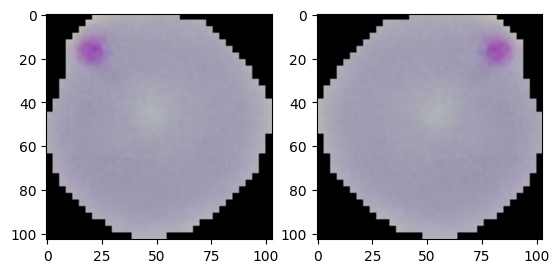

In [69]:
visualize(original_image, augmented_image)

In [70]:
# IM_SIZE = 224
# def resize_rescale_layers(image, label):
#     return tf.image.resize(image, (IM_SIZE, IM_SIZE))/225.0, label

In [119]:
resize_rescale_layers = tf.keras.Sequential([
    Resizing(IM_SIZE, IM_SIZE),
    Rescaling(1.0/225),
])

In [120]:
def augment(image, label):
    image,label = resize_rescale(image, label)
    
    image = tf.image.rot90(image)
    # image = tf.image.adjust_saturation(image, saturation_factor = 0.3)
    #Satuation with this type of images if not a good idea, because the infected part of the cells will become indistinguishable
    image = tf.image.flip_left_right(image)
    
    return image,label

In [35]:
train_dataset = (train_dataset
                .shuffle(buffer_size=8, reshuffle_each_iteration=True)
                # .map(augment)
                .batch(1)
                .prefetch(tf.data.AUTOTUNE))

val_dataset = (val_dataset
                .shuffle(buffer_size=8, reshuffle_each_iteration=True)
                # .map(resize_rescale)
                .batch(1)
                .prefetch(tf.data.AUTOTUNE))

In [36]:
augment_layers = tf.keras.Sequential([
    RandomRotation(factor = (0.25, 0.2501)),
    RandomFlip(mode = 'horizontal',),
])

def augment_layer(image, label):
    return augment_layers(resize_rescale_layers(image), training = True), label

In [37]:
# test_dataset = test_dataset.map(augment_layers)

In [40]:
model= tf.keras.Sequential([
    InputLayer (input_shape= (None, None, 3)),

    resize_rescale_layers,
    augment_layers,
    
    Conv2D(filters = 6, kernel_size = 5, strides=1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides= 2),
    Conv2D(filters = 16, kernel_size = 5, strides=1, padding='valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides= 2),
    
    Flatten (),

    NeuralearnDense (100, activation = "relu"),
    BatchNormalization(),
    NeuralearnDense (10, activation = "relu"),
    BatchNormalization(),
    NeuralearnDense (1, activation = "sigmoid"),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_2 (Bat  (None, 220, 220, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)     

In [41]:
model.compile(optimizer=Adam(learning_rate = 0.01),
             loss = BinaryCrossentropy(),
             metrics = 'accuracy'
             )

In [43]:
with tf.device('/gpu:0'):
    history = model.fit(train_dataset, validation_data = val_dataset, epochs =10, verbose = 1)

Epoch 1/10
22046/22046 [==============================] - 135s 6ms/step - loss: 0.6952 - accuracy: 0.4997 - val_loss: 4.4407 - val_accuracy: 0.4995
Epoch 2/10
22046/22046 [==============================] - 154s 7ms/step - loss: 0.6952 - accuracy: 0.5014 - val_loss: 11.3646 - val_accuracy: 0.5474
Epoch 3/10
22046/22046 [==============================] - 146s 7ms/step - loss: 0.6952 - accuracy: 0.4978 - val_loss: 0.7035 - val_accuracy: 0.4918
Epoch 4/10
22046/22046 [==============================] - 153s 7ms/step - loss: 0.6950 - accuracy: 0.4975 - val_loss: 31.0387 - val_accuracy: 0.5136
Epoch 5/10
22046/22046 [==============================] - 156s 7ms/step - loss: 0.6954 - accuracy: 0.4963 - val_loss: 9.5026 - val_accuracy: 0.4998
Epoch 6/10
18703/22046 [========================>.....] - ETA: 20s - loss: 0.6951 - accuracy: 0.4992

KeyboardInterrupt: 

In [25]:
# import tensorflow as tf
# tf.config.list_physical_devices('GPU')

In [6]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# Mixup Data augmentation

In [73]:
lamba = tfp.distributions.Beta(0.2, 0.2)
print(lamba.sample(1)[0])

tf.Tensor(0.024371069, shape=(), dtype=float32)


In [74]:
train_dataset_1 = train_dataset.shuffle (buffer_size = 8, reshuffle_each_iteration = True).map(resize_rescale)
train_dataset_2 = train_dataset.shuffle (buffer_size = 8, reshuffle_each_iteration = True).map(resize_rescale)
mixed_dataset = tf.data. Dataset.zip((train_dataset_1, train_dataset_2))

In [75]:
def mixup(train_dataset_1, train_dataset_2):
    
    (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2
    
    lamda = tfp.distributions.Beta (0.2, 0.2)
    lamda = lamda.sample (1) [0]
    image = lamda*image_1 + (1-lamda) *image_2
    label = lamda*tf.cast (label_1, dtype = tf.float32) + (1-lamda) *tf.cast (label_2, dtype = tf.float32)
    
    return image, label

In [76]:
train_dataset = (mixed_dataset
                .shuffle(buffer_size=8, reshuffle_each_iteration=True)
                .map(mixup)
                .batch(32)
                .prefetch(tf.data.AUTOTUNE))


val_dataset = (val_dataset
                .shuffle(buffer_size=8, reshuffle_each_iteration=True)
                .map(resize_rescale)
                .batch(1)
                .prefetch(tf.data.AUTOTUNE))

# Cut Mix Data augmentation

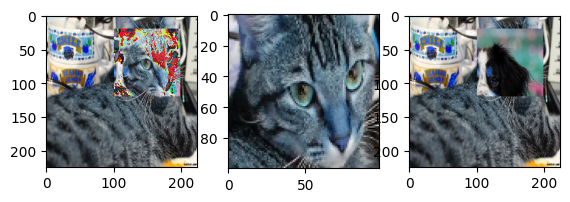

In [91]:
plt.figure(figsize=(16, 8)) 

# plt.subplot (1,5,1)
image_1 = cv2.resize(cv2.imread('cat.jpg'), (IM_SIZE, IM_SIZE))
# plt.imshow(image_1)

# plt.subplot (1,5,2)
image_2 = cv2.resize(cv2.imread('dog.jpg'), (IM_SIZE, IM_SIZE))
# plt.imshow(image_2)

# plt.subplot (1,5,3)
crop= tf.image. crop_to_bounding_box (image_2, 20, 100, 100, 98)
# plt.imshow (crop)

# plt.subplot (1,5,4)
image_4 = tf.image.pad_to_bounding_box(crop, 20, 100, IM_SIZE, IM_SIZE)
# plt.imshow(image_4)

# plt.subplot (1,5,5)
image_4 = tf.image.pad_to_bounding_box (crop, 20, 100, IM_SIZE, IM_SIZE)
# plt.imshow(image_4 + image_1)

plt.subplot (1,7,5)
image_4 = tf.image.pad_to_bounding_box(crop, 20, 100, IM_SIZE, IM_SIZE)
plt.imshow(image_4 + image_1)

plt.subplot (1,7,6)
crop_cat= tf.image.crop_to_bounding_box(image_1, 20, 100, 100, 98)
plt.imshow (crop_cat)

plt.subplot (1,7,7)
image_5 = tf.image.pad_to_bounding_box(crop_cat, 20, 100, IM_SIZE, IM_SIZE)
plt.imshow(image_1 - image_5 + image_4)

In [121]:
def box(lamda):
    
    r_x = tf.cast(tfp.distributions. Uniform (0, IM_SIZE).sample (1)[0], dtype = tf.int32)
    r_y = tf.cast(tfp.distributions. Uniform (0, IM_SIZE).sample (1)[0], dtype = tf.int32)
    r_w = tf.cast (IM_SIZE*tf.math.sqrt(1-lamda), dtype = tf.int32)
    r_h = tf.cast (IM_SIZE*tf.math.sqrt(1-lamda), dtype = tf.int32)
    
    r_x = tf.clip_by_value (r_x - r_w//2, 0, IM_SIZE)
    r_y = tf.clip_by_value(r_y - r_h//2, 0, IM_SIZE)
    
    x_b_r= tf.clip_by_value(r_x + r_w//2, 0, IM_SIZE)
    y_b_r= tf.clip_by_value(r_y + r_h//2, 0, IM_SIZE)
    
    r_w = x_b_r - r_x
    if r_w == 0:
        r_w = 1
    r_h = y_b_r - r_y
    
    if r_h == 0:
        r_h == 1
    
    return r_y, r_x, r_h, r_w

In [122]:
def cutmix(train_dataset_1, train_dataset_2):
    (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2
    
    lamda = tfp.distributions.Beta (0.2, 0.2)
    lamda = lamda.sample (1) [0]

    r_y, r_x, r_h, r_w = box(lamda)
    
    crop_2 = tf.image. crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
    pad_2 = tf.image.pad_to_bounding_box(crop_2,r_y, r_x, IM_SIZE, IM_SIZE)
    
    crop_1 = tf.image.crop_to_bounding_box (image_1, r_y, r_x, r_h, r_w)
    pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, IM_SIZE, IM_SIZE)
    image = image_1 - pad_1 + pad_2

    lamda = tf.cast(1- (r_w*r_h)/(IM_SIZE*IM_SIZE), dtype = tf.float32)
    label = lamda * tf.cast (label_1, dtype = tf.float32) + (1-lamda) *tf.cast (label_2, dtype = tf.float32)
    
    return image, label

In [123]:
train_dataset = (mixed_dataset
                .shuffle(buffer_size=8, reshuffle_each_iteration=True)
                .map(cutmix)
                .batch(32)
                .prefetch(tf.data.AUTOTUNE))


val_dataset = (val_dataset
                .shuffle(buffer_size=8, reshuffle_each_iteration=True)
                .map(resize_rescale)
                .batch(1)
                .prefetch(tf.data.AUTOTUNE))

# Custom Fit

In [173]:
OPTIMIZER = Adam(learning_rate=0.01)
EPOCHS = 10
METRIC = BinaryAccuracy()
METRIC_VAL = BinaryAccuracy()

In [159]:
FACTOR = 1
def custom_bce(FACTOR, y_true, y_pred):
    def loss(self, y_true, y_pred):
        bce = BinaryCrossentropy()
        return bce(y_true, y_pred) * FACTOR
    return loss

In [162]:
@tf.function
def training_block(x_batch, y_batch):
    l = BinaryCrossentropy()
    with tf.GradientTape() as recorder:
        y_pred = model(x_batch, training = True)
        loss = l(y_batch, y_pred)

    partial_derviative = recorder.gradient(loss, model.trainable_weights)

    OPTIMIZER.apply_gradients(zip(partial_derviative, model.trainable_weights))
    METRIC.update_state(y_batch, y_pred)
    return(loss)
    

In [166]:
@tf.function
def val_block(x_batch_val, y_batch_val):
    y_pred_val = model(x_batch_val, training = False)
    loss_val = l(y_batch_val, y_pred_val)
    METRIC_VAL.update_state(y_batch_val, y_pred_val)
    return loss_val

In [167]:
for epoch in range(EPOCHS):

    for step,(x_batch, y_batch) in enumerate(train_dataset):
        train_loss = training_block(x_batch, y_batch)
    print("The accuracy is:", METRIC.result())
    METRIC.reset_states()
    
    for step,(x_batch_val, y_batch_val) in enumerate(val_dataset):
        val_loss = val_block(x_batch_val, y_batch_val)
        
    print("The accuracy is:", METRIC_VAL.result())
    METRIC_VAL.reset_states()

The accuracy is: tf.Tensor(0.9676585, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.8112523, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.9507394, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.9284936, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.96783996, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.94591653, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.97115123, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.9401089, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.96697813, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.73212343, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.9721945, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.87803996, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.9775016, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.76660615, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.97056156, shape=(), dtype=float32)
The accuracy is: tf.Tensor(0.50235933, shape=()

KeyboardInterrupt: 

In [175]:
def neuralearn(model, METRIC, METRIC_VAL, train_dataset, val_dataset, EPOCHS):
    for epoch in range(EPOCHS):

        for step,(x_batch, y_batch) in enumerate(train_dataset):
            train_loss = training_block(x_batch, y_batch)
        print("The accuracy is:", METRIC.result())
        METRIC.reset_states()
        
        for step,(x_batch_val, y_batch_val) in enumerate(val_dataset):
            val_loss = val_block(x_batch_val, y_batch_val)
            
        print("The accuracy is:", METRIC_VAL.result())
        METRIC_VAL.reset_states()

In [1]:
OPTIMIZER = Adam(learning_rate=0.01)
EPOCHS = 10
METRIC = BinaryAccuracy()
METRIC_VAL = BinaryAccuracy()

neuralearn(model, METRIC, METRIC_VAL, train_dataset, val_dataset, EPOCHS)

NameError: name 'Adam' is not defined